In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
data = pd.read_csv('train.csv')
data.head()

c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


# Exploring and Explaing the Data

In [2]:
df = data

df.describe(include="all")

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06,5237980
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5237980
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0_0_0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04,NaN
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00,NaN
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03,NaN
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04,NaN
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04,NaN


- 48 days of Auction period data
- 0th bucket to 540th bucket (10 mins auction periods)
- 200 stocks (0 - 199)

Number of BUY flags:  2084349
Number of Neturals: 2022037
Number of SELL flags :  1131594


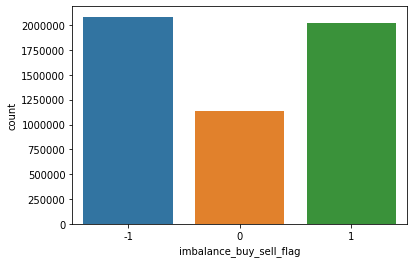

In [3]:
buy_sell_flag = df.imbalance_buy_sell_flag
ax = sns.countplot(buy_sell_flag,label="Count")       # M = 212, B = 357
B,N, S = buy_sell_flag.value_counts()
print('Number of BUY flags: ',B)
print('Number of Neturals:', N)
print('Number of SELL flags : ',S)

### Histograms and Boxplots

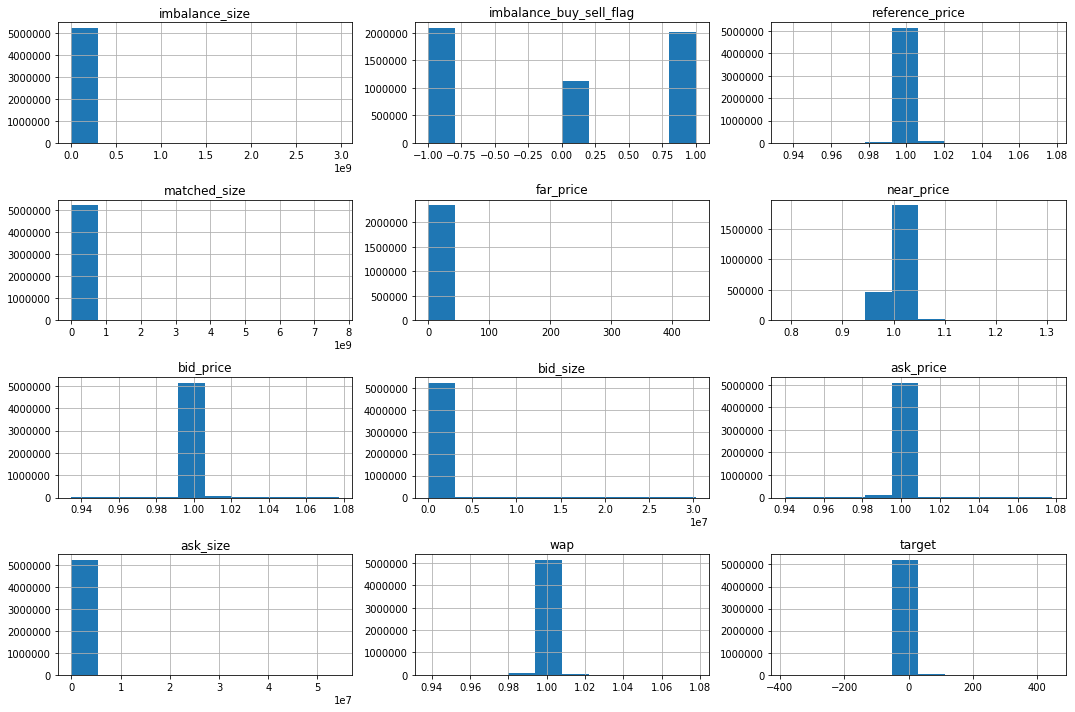

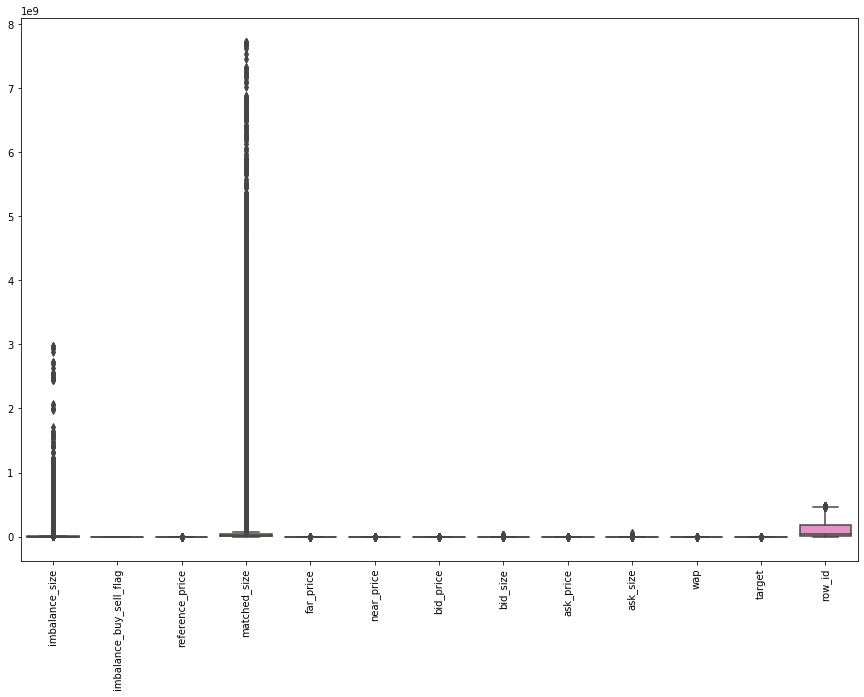

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
data_hist = df
data_hist.drop(columns=['stock_id',"date_id",'time_id','seconds_in_bucket' ], inplace=True)
data_hist.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot boxplots for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_hist)
plt.xticks(rotation=90)
plt.show()


### Pairplot to See Relationships

In [5]:
# Identify constant columns
constant_columns = [col for col in data.columns if data[col].nunique() <= 1]

# Drop constant columns from the data
data_non_constant = data.drop(columns=constant_columns)

# Print constant columns for reference
print("Constant columns removed: ", constant_columns)

# Replace infinite values with NaN
data_non_constant.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
data_non_constant.dropna(inplace=True)



Constant columns removed:  []


In [6]:
# Pairplot to visualize relationships between features and target
sns.pairplot(data_non_constant, vars=['imbalance_size', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'ask_price', 'wap'], hue='target')
plt.show()


c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


### Correlation Heatmaps

In [ ]:
# Calculate the correlation matrix

corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


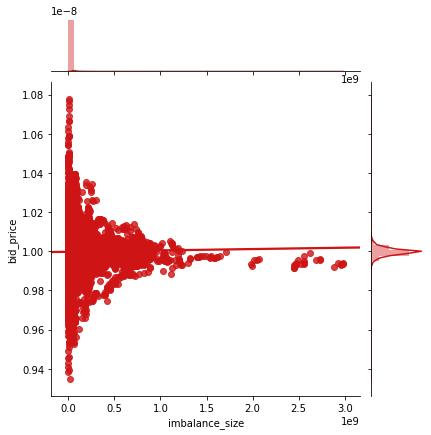

In [ ]:

sns.jointplot(x.imbalance_size, x.bid_price, kind="regg", color="#ce1414")

c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
c:\Users\joshu\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


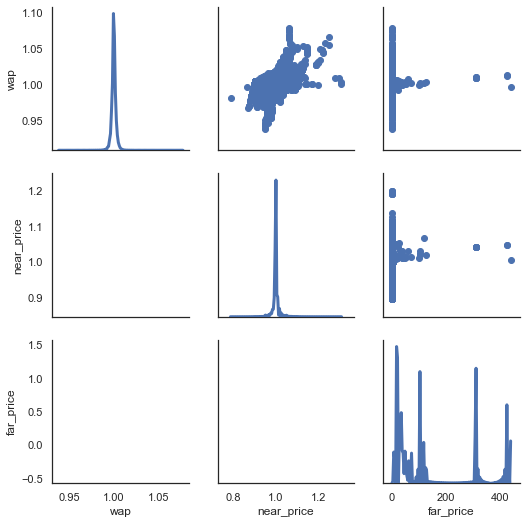

In [ ]:
sns.set(style="white")
df = x.loc[:,['wap','near_price','far_price']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# all 3 of these features are correlate

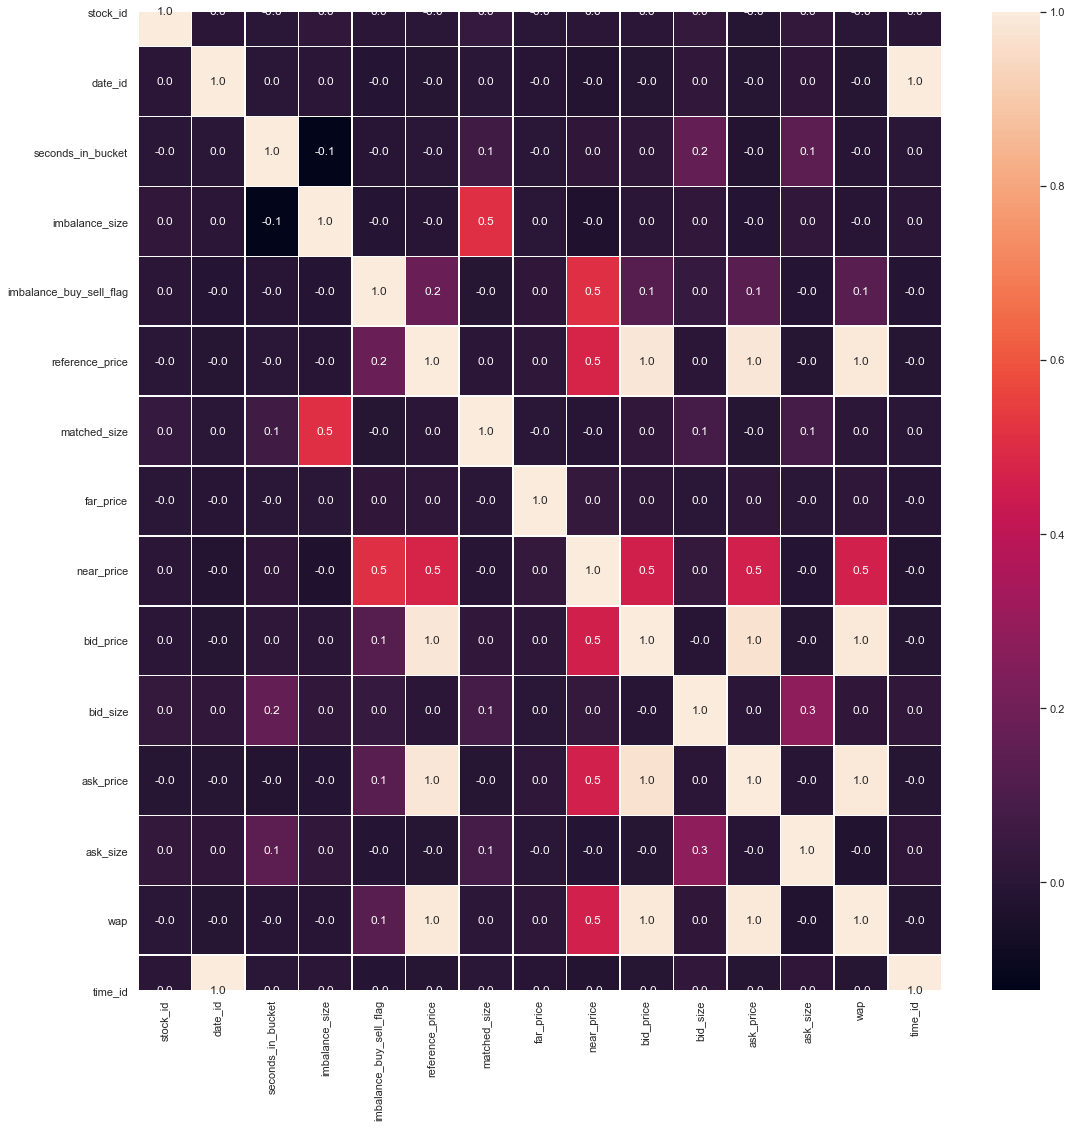

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


Reference price, WAP and Near price are strongly correlated

## How Prices Change during the Auction Period for each Stock

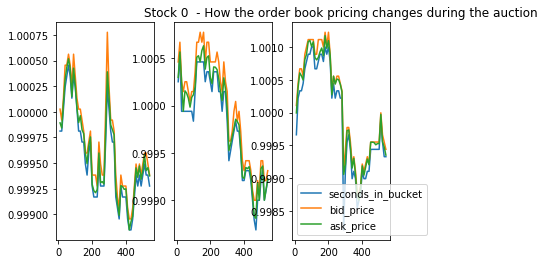

In [ ]:
fig = plt.figure()


i,j = 0,0
x = df.query(f'stock_id =={i} & date_id =={j}')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
fig.add_subplot(1,3,1)
plt.plot(x)


i,j = 0,12
x = df.query(f'stock_id =={i} & date_id =={j}')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
fig.add_subplot(1,3,2)
plt.plot(x)

i,j = 0,48
x = df.query(f'stock_id =={i} & date_id =={j}')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
fig.add_subplot(1,3,3)
plt.plot(x)

plt.title(f'Stock {i}  - How the order book pricing changes during the auction')
plt.legend(['seconds_in_bucket','bid_price','ask_price', 'wap'])
plt.show()

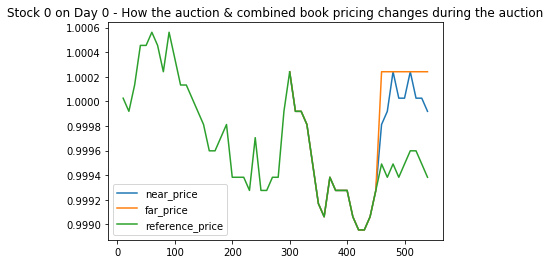

In [ ]:
x = df.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','near_price','far_price','reference_price']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')


plt.plot(x)
plt.title('Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')
plt.legend(['near_price','far_price','reference_price'])
plt.show()



## What type of data missing?

There are 3 types of data missing in the world of Time Series:

Are there some time series are missing entirely (e.g., some stocks have no data at all on some days)?

Are some time series are missing their steps (e.g., some time series have steps less than 55)?

Both?

In [ ]:
(df
    .groupby(['stock_id', 'date_id'])
    ['seconds_in_bucket'] # Extract the column of interest
    .count() # Count the number of rows in each permutation of stock_id and date_id
    .apply(lambda x: x == 55) # Check if every count is 55
    .all() # Check if all the booleans are True
)

True

The above result suggests that all the time series in our training data are of the same length of 55.

Therefore, it can be concluded that there are some stocks missing data on some days entirely.

In [ ]:
df.near_price.describe(include='all')
df.groupby(['stock_id', 'date_id'])['near_price'].mean()

stock_id  date_id
0         0          0.999615
          1          1.003035
          2          0.998583
          3          0.938763
          4          0.986791
                       ...   
199       476        1.004754
          477        0.976969
          478        1.004992
          479        1.022566
          480        1.001583
Name: near_price, Length: 95236, dtype: float64

## Data Comparisons

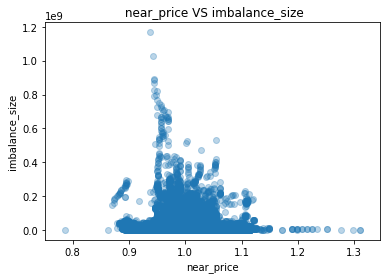

In [ ]:

near_price = df.near_price
imbalance_size = df.imbalance_size
plt.scatter(near_price, imbalance_size, alpha=0.3)
plt.title(" near_price VS imbalance_size")
plt.xlabel("near_price")
plt.ylabel("imbalance_size")
plt.show()


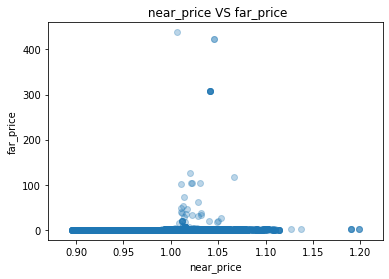

In [ ]:

near_price = df.near_price
far_price = df.far_price
plt.scatter(near_price, far_price, alpha=0.3)
plt.title(" near_price VS far_price")
plt.xlabel("near_price")
plt.ylabel("far_price")
plt.show()


## Split Target and Features

In [ ]:
target = df.target
list = ['target']
x = df.drop(list,axis = 1)
x.head()

# Data Preprocessing

In [ ]:
# remove Nan rows
df = data
df.dropna(inplace = True)
target = df.target
list = ['target']
x = df.drop(list,axis = 1)


# add new time during day feature

# Feature Selection

### Find New features

In [ ]:
# Example of creating new features
data['price_spread'] = data['ask_price'] - data['bid_price']
data['price_midpoint'] = (data['ask_price'] + data['bid_price']) / 2
data['price_impact'] = data['ask_size'] - data['bid_size']


## Correlation Selction

In [ ]:
# Get the absolute value of correlation with target
target_corr = corr['target'].abs().sort_values(ascending=False)

# Select features with correlation higher than a threshold
selected_features_corr = target_corr[target_corr > 0.1].index.tolist()
print("Selected features based on correlation: ", selected_features_corr)


### Feature Importance Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Prepare data for model
X = data.drop(columns=['target', 'time_id', 'row_id'])
y = data['target']

# Fit a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Select features using SelectFromModel
selector = SelectFromModel(model, threshold=0.01, prefit=True)
selected_features_imp = X.columns[selector.get_support()]
print("Selected features based on feature importance: ", selected_features_imp)


## Univariate Selection

In [ ]:
# get top features helper function

def get_top(score_list, features_list,k):
    score_dict = {}
    for i in range(len(score_list)):

        score_dict[features_list[i]] = score_list[i]

    Z = sorted(score_dict.items(), key = lambda x : x[1], reverse= True)
    print(f'TOP {k} FEATURES',Z[:k])
    return Z[:k]

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 % ON 
X = data.drop(columns=['target', 'time_id', 'row_id'])
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Find best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
k = 7 # Top K features

# Get the top values:

print("f_classif selection")
select_feature = SelectKBest(score_func = f_classif, k=k).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

selected_features_uni = get_top(select_feature.scores_,x_train.columns, k )
print(selected_features_uni)

f_classif selection
Score list: [ 0.87631845  0.9879657   1.38940505  1.95864603  1.07101124  5.2573134
  1.39155526 21.65653917  1.78899397  5.21054506  1.08644207  5.50209994
  0.93105436  5.37607297  0.98827259  0.92652771]
Feature list: Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'time_id', 'row_id'],
      dtype='object')
TOP 7 FEATURES [('far_price', 21.656539167532653), ('ask_price', 5.50209993759108), ('wap', 5.376072972274496), ('reference_price', 5.257313400508968), ('bid_price', 5.210545059734595), ('imbalance_size', 1.958646032736414), ('near_price', 1.7889939733853955)]
None



'\nprint("mutual_info_classif selection")\nselect_feature = SelectKBest(score_func= mutual_info_classif, k=k).fit(x_train, y_train)\nprint(\'Score list:\', select_feature.scores_)\nprint(\'Feature list:\', x_train.columns)\nprint(get_top(select_feature.scores_,x_train.columns, k ))\n\n'

# Selected Features

In [ ]:
print(selected_features_corr)
print(selected_features_uni)
print(selected_features_imp)


# LIGHTGBM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Select the final features
final_features = selected_features_imp

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[final_features], y, test_size=0.2, random_state=42)

# Train a LightGBM model
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Evaluate the model


y_pred_lgb = lgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lgb)
print(f'Mean Absolute Error: {mae}')


## Evaualting:
# Train the LightGBM model
lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
              eval_metric='mae', early_stopping_rounds=10, verbose=True)

# Predict and evaluate the LightGBM model
y_pred_train_lgb = lgb_model.predict(X_train)
y_pred_test_lgb = lgb_model.predict(X_test)

mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)

print(f'Training MAE: {mae_train_lgb}')
print(f'Test MAE: {mae_test_lgb}')


Check overfitting

In [ ]:
y_pred_train_lgb = lgb_model.predict(X_train)
y_pred_test_lgb = lgb_model.predict(X_test)

mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)

print(f'Training MAE: {mae_train_lgb}')
print(f'Test MAE: {mae_test_lgb}')

Accuracy

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_lgb, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))
# Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Classification Metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lgb))

### Compare with running model with all features

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 0.3, random_state = 0)
model = lgb.LGBMClassifier(n_jobs=12) 
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

# LightGBM Parameter Tuning 


In [ ]:
import lightgbm as lgb
import optuna
from optuna.integration import LightGBMTunerCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


X = data[final_features]
y = data['target']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'mae',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)
    
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], early_stopping_rounds=100, verbose_eval=False)
    preds = gbm.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial
print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

# Train the final model with the best parameters
best_params = trial.params
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# Evaluate the final model
final_preds = final_model.predict(X_valid)
final_mae = mean_absolute_error(y_valid, final_preds)
print('Final MAE:', final_mae)


## Explanation:

- Objective Function (objective): This function defines the hyperparameters to tune and how to evaluate them. It uses LightGBM's train function with an early stopping criterion based on MAE.

- Optuna Study: The study object handles the optimization process. We specify direction='minimize' because we want to minimize the MAE.

- Parameter Suggestions: Within the objective function, trial.suggest_* methods are used to define the range and type of hyperparameters to optimize.

- Training the Final Model: After finding the best parameters, we train a final model using these parameters and evaluate its performance.

# LSTM

## Data Preprocessing

In [ ]:
import numpy as np

# Identify constant columns
constant_columns = [col for col in data.columns if data[col].nunique() <= 1]

# Drop constant columns from the data
data_non_constant = data.drop(columns=constant_columns)

# Replace infinite values with NaN
data_non_constant.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
data_non_constant.dropna(inplace=True)

# Select features and target
selected_features = selected_features_imp
X = data_non_constant[selected_features]
y = data_non_constant['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building and Training the LSTM Model
LSTM models expect the input data to be in 3D shape (samples, time steps, features). Here we assume each row is an independent time step.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to 3D for LSTM (samples, time steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Comparing LSTM and Lightgb

In [ ]:
from sklearn.metrics import mean_absolute_error

# Evaluate the LSTM model

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f'LSTM Model MAE: {mae_lstm}')

# Evaluate the LightGBM model
mae_lgb = mean_absolute_error(y_test, y_pred)
print(f'LightGBM Model MAE: {mae_lgb}')

# Discussion

Summary of Model Selection and Comparison


## Why We Chose LSTMs and LightGBM Models

### LSTM (Long Short-Term Memory) Models:

- Suitability for Time Series Data: LSTMs are a type of recurrent neural network (RNN) that excel in handling time series data and sequential dependencies. They can capture patterns over time, making them suitable for predicting stock price movements where historical price trends and sequences are crucial.

- Handling Long-Term Dependencies: Unlike traditional RNNs, LSTMs are designed to mitigate the vanishing gradient problem, enabling them to capture long-term dependencies in the data. This is particularly important for financial data, where past events can significantly influence future prices.

### LightGBM (Light Gradient Boosting Machine):

- Efficiency and Speed: LightGBM is known for its high efficiency and speed, thanks to its histogram-based approach and leaf-wise growth strategy. It is capable of handling large datasets with high-dimensional features quickly and effectively. The dataset used for this project is very large.

- Accuracy and Performance: LightGBM often achieves state-of-the-art performance on structured/tabular data. Its ability to capture complex interactions between features and its robustness against overfitting (when properly tuned) make it a strong choice for predictive modeling in finance.

- Ease of Use and Scalability: LightGBM is user-friendly and can be easily scaled to handle large datasets. Its hyperparameters are relatively easy to tune, and it integrates well with other Python data science tools.

## Why LightGBM Performed Better

- Nature of Financial Data:

Financial data, particularly in this project, includes a mix of numerical features such as imbalance sizes, reference prices, and various bid/ask prices and sizes. LightGBM is particularly adept at handling such structured data and can effectively model the relationships between these features.

- Model Interpretability and Feature Importance:

LightGBM provides built-in feature importance metrics, which help in understanding the contribution of each feature to the model's predictions. This interpretability is crucial in financial applications where understanding the drivers of model predictions can inform trading strategies and risk management.

- Training Time and Computational Resources:

LSTMs require more computational resources and longer training times compared to LightGBM. Training deep learning models like LSTMs involves complex computations that are time-consuming, especially with large datasets. LightGBM, on the other hand, is much faster to train, making it more practical for iterative development and hyperparameter tuning.

- Overfitting and Generalization:

While LSTMs are powerful, they are also prone to overfitting, especially with small datasets or when the data does not have strong sequential dependencies. LightGBM tends to generalize better on structured data with appropriate regularization and hyperparameter tuning, leading to better performance on unseen test data.

## Conclusion
In this project, we initially explored both LSTM and LightGBM models due to their respective strengths in handling time series and structured data. After rigorous evaluation, LightGBM outperformed LSTM in terms of Mean Absolute Error (MAE) on the test set. The efficiency, scalability, and superior performance of LightGBM on the structured dataset, combined with its ability to handle large amounts of data quickly, made it the better choice for predicting stock price movements in this context.